In [ ]:
"""
COMP 559 Homework 2 on Exploring network science

"""

In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# importing modules

In [2]:
from os import sys
sys.path.append("../../../graph_tools")
sys.path.append("../../../python_tools/python_tools/")

In [10]:
import networkx_utils as xu
import graph_statistics as gs
import graph_preprocessing as gpre
import networkx as nx

# Loading Dataset

In [5]:
import system_utils as su
G = su.decompress_pickle("../../../Data/G_query_v6_filtered.pbz2")

In [6]:
xu.print_node_edges_counts(G)

 Graph: # of nodes = 57458, # of edges = 1904155


# Preprocessing the Dataset

In [16]:
n_sample = 5_000
G_pre = gpre.random_subgraph(G,size = n_sample,verbose =True, return_largest_component=True)
print(f"After sampling to {n_sample}")
xu.print_node_edges_counts(G_pre)
G_simple = nx.Graph(G_pre)

After sampling: 
 Graph: # of nodes = 5000, # of edges = 13597
Largest connected component size = 3592
After sampling to 5000
 Graph: # of nodes = 3592, # of edges = 13527


# Problem 1

# Part A: Describe the meaning and number of vertices,edges and attributes in our network

In [17]:
"""
vertices: neurons in the 1 mm^3 volume of mouse visual cortex imaged
edges: The synaptic connections between a presynaptic and postsynaptic neuron (implies a communicaiton link)

vertices attributes: properties of the morphology of the neuron. Example (but not limited to): 
- spine density
- synaptic density
- classification: excitatory/inhibitory
- skeletal length (a relative size measurement)

edge attributes: properties of the synpatic connection. Example: 
- volume of synapse
- presynaptic/postsynaptic compartment (ex: apical, axon, basal) where synapse is located
- skeletal walk distance from presynaptic/postsynaptic cell body to synaptic connection

"""

'\nvertices: neurons in the 1 mm^3 volume of mouse visual cortex imaged\nedges: The synaptic connections between a presynaptic and postsynaptic neuron (implies a communicaiton link)\n\nvertices attributes: properties of the morphology of the neuron. Example (but not limited to): \n- spine density\n- synaptic density\n- classification: excitatory/inhibitory\n- skeletal length (a relative size measurement)\n\nedge attributes: properties of the synpatic connection. Example: \n- volume of synapse\n- presynaptic/postsynaptic compartment (ex: apical, axon, basal) where synapse is located\n- skeletal walk distance from presynaptic/postsynaptic cell body to synaptic connection\n\n'

In [18]:
xu.print_node_edges_counts(G_simple)

 Graph: # of nodes = 3592, # of edges = 8206


# Part B: Compute the networks degree distribution, clustering coefficient and diameter

In [19]:
import graph_statistics as gs
import graph_visualizations as gviz

# Degree Distribution

MICrONS neural dataset in_and_out degree distribution mean = 4.035264483627204,
MICrONS neural dataset in_and_out degree distribution median = 2.0


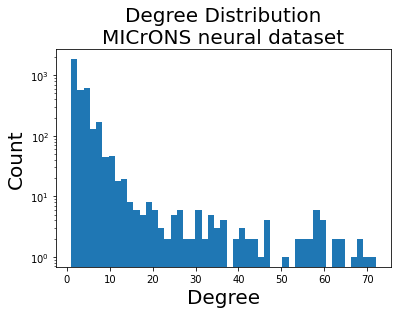

MICrONS neural dataset in distribution can't be graphed
MICrONS neural dataset out distribution can't be graphed


{'in_and_out_mean': 4.035264483627204,
 'in_and_out_median': 2.0,
 'in_mean': None,
 'in_median': None,
 'out_mean': None,
 'out_median': None}

In [20]:
gs.degree_distribution_analysis(G_simple,graph_title = "MICrONS neural dataset")

# Transitivity

In [21]:
import networkx as nx

G_transitivity = gs.transitivity(G_simple)
print(f"G_transitivity= {G_transitivity}")

G_transitivity= 0.028442115292996666


# Diameter (the longest shortest path)

In [23]:
G_diam = gs.diameter(G_simple)
print(f"G_diam = {G_diam}")

G_diam = 14


# Problem 2

In [36]:
verbose = True
import numpy as np

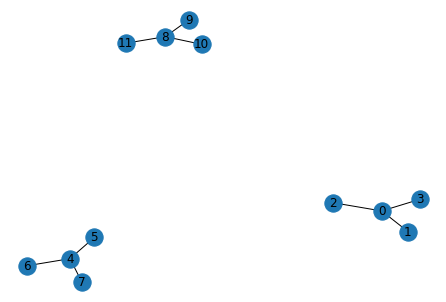

In [31]:
edge_list = []
for k in range(3):
    curr_node_name = 4*k
    edge_list += [[curr_node_name,curr_node_name+j] for j in range(1,4)]
    
B = nx.from_edgelist(edge_list)
node_names = list(B.nodes())
nx.draw(B,with_labels = True)

In [32]:
"""
Purpose: Find all the missing edges of B
in comparison to a complete graph with 12 nodes
"""

import numpy_utils as nu

all_possible_edges = nu.all_unique_choose_2_combinations(node_names)
if verbose:
    print(f"Numer all possible edges = {len(all_possible_edges)}")
    
missing_edges = nu.setdiff2d(all_possible_edges,edge_list)
if verbose:
    print(f"number of missing edges = {len(missing_edges)}")

Numer all possible edges = 66
number of missing edges = 57


In [39]:
"""
Compute the probabilites for all of the missing edges

"""
node_degrees = [xu.get_node_degree(B,k) for k in node_names]
if verbose:
    print(f"node_degrees = {node_degrees}")
    
prob_connection = np.array([node_degrees[k[0]]*node_degrees[k[1]] for k in missing_edges])
prob_connection = prob_connection/np.sum(prob_connection)

if verbose:
    print(f"Probabiites of connection:")
#     for k,prob in zip(missing_edges,prob_connection):
#         print(f"Edge {k}: {prob}")
    print(f"Max probability = {missing_edges[np.argmax(prob_connection)]}")
    print(f"Min probability = {missing_edges[np.argmin(prob_connection)]}")
    

node_degrees = [3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1]
Probabiites of connection:
Max probability = [0 4]
Min probability = [1 2]


# Plotting ROC Curves and AUC score

In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(
    fpr,
    tpr,
    auc_score=None,
    color="darkorange",
    line_width = 2,):
    
    if auc_score is None:
        auc_score = auc(fpr,tpr)
        
    plt.plot(
    fpr,
    tpr,
    color=color,
    lw=line_width,
    label="ROC curve (area = %0.2f)" % auc_score,
    )
    
    plt.plot([0, 1], [0, 1], color="navy", lw=line_width, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

# Figure A

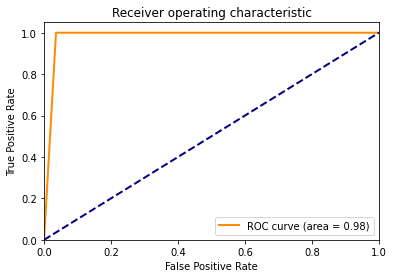

In [57]:
"""
Generate the labels for figure A
"""
fig_a_labels = np.zeros(len(missing_edges))
fig_a_true_edges = np.array([[0,4]])

for tr_edge in fig_a_true_edges:
    fig_a_labels[nu.matching_rows_old(missing_edges,tr_edge)[0]] = 1
    
fpr,tpr, _ = roc_curve(fig_a_labels,prob_connection)
plot_roc(fpr,tpr)

# Figure B

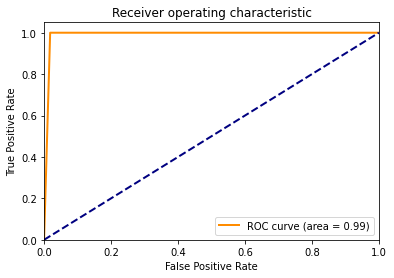

In [58]:
"""
Generate the labels for figure B
"""
fig_b_labels = np.zeros(len(missing_edges))
fig_b_true_edges = np.array([[0,4],[4,8]])

for tr_edge in fig_b_true_edges:
    fig_b_labels[nu.matching_rows_old(missing_edges,tr_edge)[0]] = 1
    
fpr,tpr, _ = roc_curve(fig_b_labels,prob_connection)
plot_roc(fpr,tpr)